# import

In [1]:
import pandas as pd
import json
from tqdm import tqdm
from glob import glob
from collections import Counter

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
plt.style.use('ggplot')
font_path = '/Users/Nozomi/Library/Fonts/THSarabunNew.ttf'
fp = fm.FontProperties(fname=font_path)

In [2]:
jsons = glob('tweets/*.json')
for i, f in enumerate(jsons):
    print(i,f)

0 tweets/#กูสั่งให้มึงอยู่ใต้รัฐธรรมนูญ.json
1 tweets/#16ตุลาไปแยกปทุมวัน.json
2 tweets/#saveวันเฉลิม.json
3 tweets/#ธรรมศาสตร์และการชุมนุม.json
4 tweets/#เกียมอุดมไม่ก้มหัวให้เผด็จการ.json
5 tweets/#25พฤศจิกาไปSCB.json
6 tweets/#ม็อบ25พฤศจิกาทวงคืนสมบัติชาติ.json
7 tweets/#ม็อบ2ธันวา.json


# open file

In [3]:
df0 = pd.read_json(jsons[0], lines=True)
df1 = pd.read_json(jsons[1], lines=True)
df2 = pd.read_json(jsons[2], lines=True)
df3 = pd.read_json(jsons[3], lines=True)
df4 = pd.read_json(jsons[4], lines=True)
df5 = pd.read_json(jsons[5], lines=True)
df6 = pd.read_json(jsons[6], lines=True)
df7 = pd.read_json(jsons[7], lines=True)

dfs = [df0,df1,df2,df3,df4,df5,df6,df7]

In [4]:
df0.iloc[3]

id                                               1381195923112353800
conversation_id                                  1381195923112353792
created_at                                 2021-04-11 17:42:24+07:00
date                                             2021-04-11 00:00:00
time                                                        17:42:24
timezone                                                         700
user_id                                                    220213059
username                                                   lerdnarit
name                                                          x-face
place                                                               
tweet              รดด้วยเยี่ยวสิ #โควิด19 #โควิด19วันนี้ #Thaila...
language                                                          th
mentions                                                          []
urls                                                              []
photos                            

In [31]:
df0['created_at'].apply(lambda x: f"{x.year}-{x.month}-{x.day}-{x.hour}")

0          2021-5-8-9
1        2021-4-19-21
2         2021-4-13-7
3        2021-4-11-17
4         2021-4-6-10
             ...     
19060    2020-11-17-0
19061    2020-11-17-0
19062    2020-11-17-0
19063    2020-11-17-0
19064    2020-11-17-0
Name: created_at, Length: 19065, dtype: object

# overview

#กูสั่งให้มึงอยู่ใต้รัฐธรรมนูญ


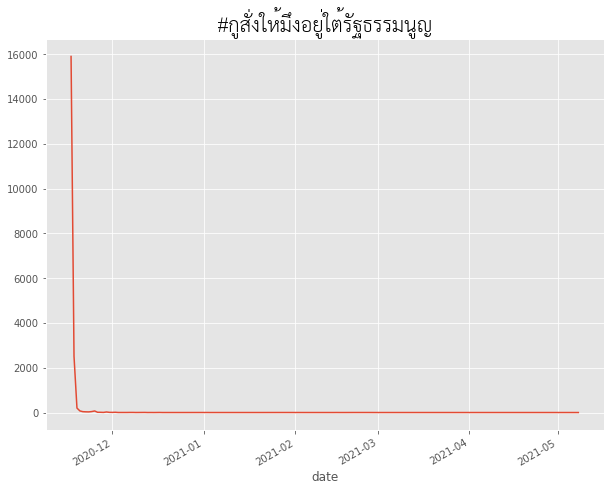

#16ตุลาไปแยกปทุมวัน


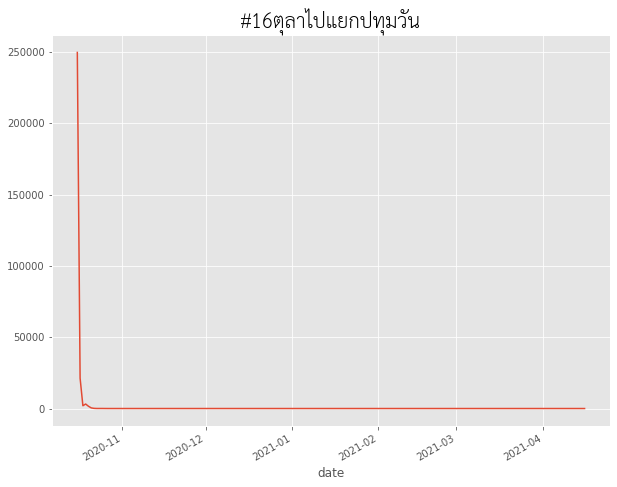

#saveวันเฉลิม


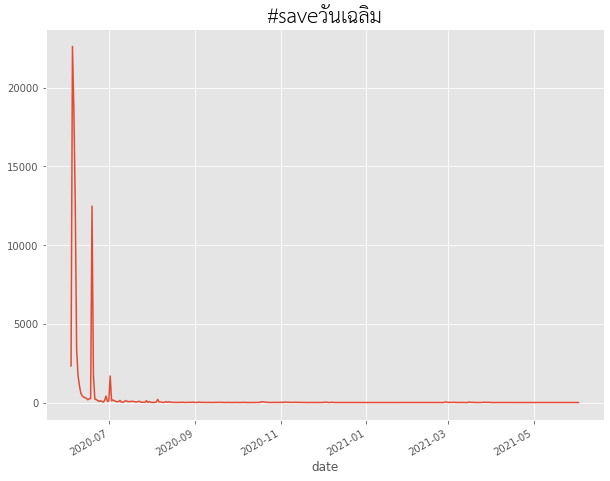

#ธรรมศาสตร์และการชุมนุม


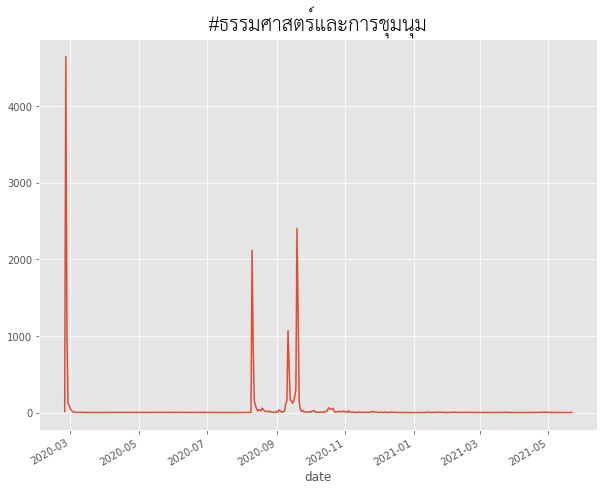

#เกียมอุดมไม่ก้มหัวให้เผด็จการ


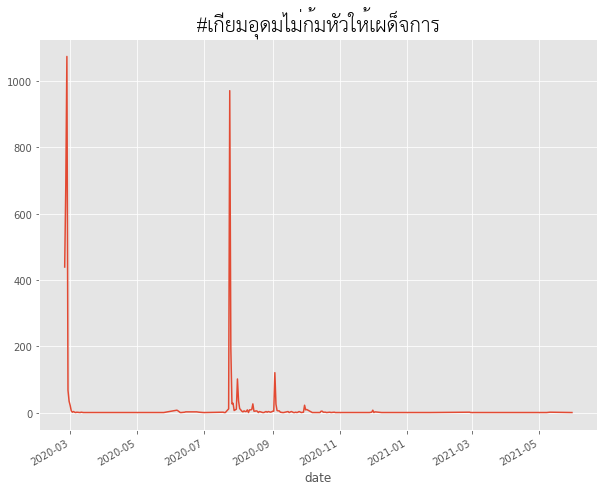

#25พฤศจิกาไปSCB


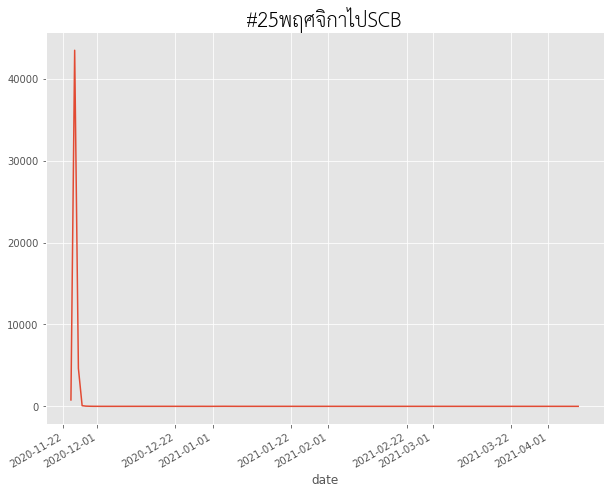

#ม็อบ25พฤศจิกาทวงคืนสมบัติชาติ


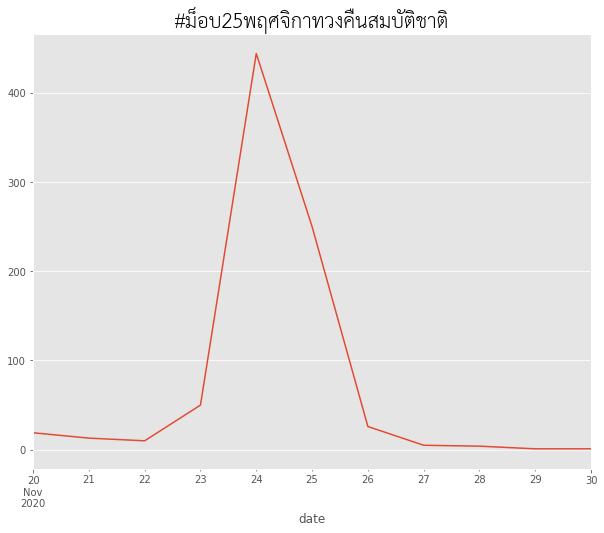

#ม็อบ2ธันวา


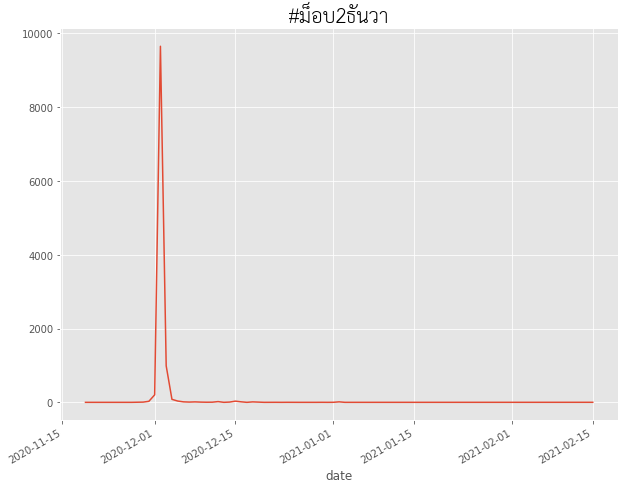

In [5]:
for i, df in enumerate(dfs):
    fig = plt.figure(figsize=(10,8))
    hashtag = jsons[i].split('/')[1].replace('.json','')
    print(hashtag)
    df.groupby(df["date"]).count()['id'].plot()
    plt.title(hashtag, fontproperties=fp, fontsize=30)
    plt.show()

#ม็อบ2ธันวา


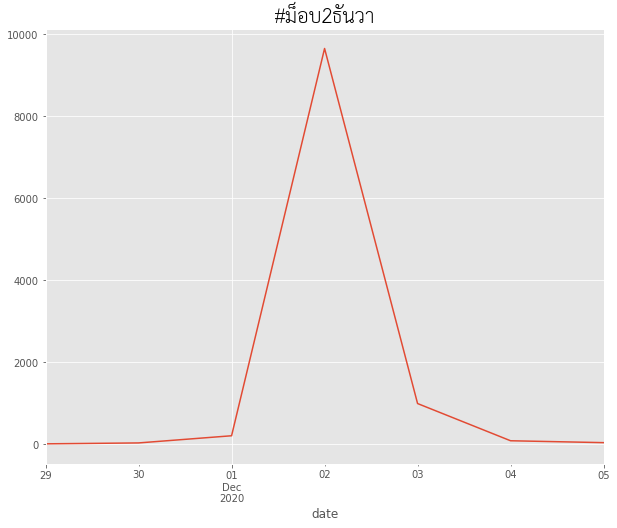

In [6]:
### find peak ###

fig = plt.figure(figsize=(10,8))

i = 7
#df = dfs[i]
#df = dfs[i][dfs[i].date <= '2020-3-1']
df = dfs[i][(dfs[i].date >= '2020-11-28') & (dfs[i].date <= '2020-12-05')]

hashtag = jsons[i].split('/')[1].replace('.json','')
print(hashtag)
df.groupby(df["date"]).count()['id'].plot()
plt.title(hashtag, fontproperties=fp, fontsize=30)
plt.show()

# overview2

In [75]:
i = 0
df = dfs[i]
hashtag = jsons[i].split('/')[1].replace('.json','')

print('total', len(df))
print('people', len(df.groupby('username').count()['id']))

total 17656
people 8087


In [74]:
for i, v in df.groupby('username').count()['id'].sort_values(ascending=False).value_counts().sort_index().iteritems():
    print(f"|{i}|{v}|")

8286 people
|1|5604|
|2|1202|
|3|493|
|4|269|
|5|157|
|6|92|
|7|90|
|8|53|
|9|49|
|10|41|
|11|32|
|12|24|
|13|17|
|14|16|
|15|13|
|16|18|
|17|17|
|18|10|
|19|11|
|20|8|
|21|9|
|22|3|
|23|8|
|24|1|
|25|3|
|26|4|
|27|2|
|29|1|
|30|2|
|31|1|
|32|1|
|33|2|
|34|1|
|35|3|
|36|3|
|37|1|
|38|1|
|39|2|
|40|3|
|41|2|
|42|1|
|44|1|
|45|2|
|47|2|
|48|1|
|49|2|
|56|1|
|59|1|
|62|1|
|68|2|
|118|1|
|136|1|
|355|1|


# active users & influential # associated hashtags

~~~
0 tweets/#กูสั่งให้มึงอยู่ใต้รัฐธรรมนูญ.json
1 tweets/#16ตุลาไปแยกปทุมวัน.json
2 tweets/#saveวันเฉลิม.json
3 tweets/#ธรรมศาสตร์และการชุมนุม.json
4 tweets/#เกียมอุดมไม่ก้มหัวให้เผด็จการ.json
5 tweets/#25พฤศจิกาไปSCB.json
6 tweets/#ม็อบ25พฤศจิกาทวงคืนสมบัติชาติ.json
7 tweets/#ม็อบ2ธันวา.json
~~~

In [7]:
i = 7
df = dfs[i]
hashtag = jsons[i].split('/')[1].replace('.json','')

# define duration 
#df = df[(df.date >= '2020-06-17') & (df.date <= '2020-06-21')]
df = df[(df.date >= '2020-11-30') & (df.date <= '2020-12-04')]

print(hashtag)
print('\n- total tweets :', len(df))
print('- distinct users :', len(df.groupby('username').count()['id']))
#print('- oldest tweet : ')
#print('- peak : ')
print()

# active user posts
print("|num of posts (per person)|num of people|\n|:-:|:-:|")
for i, v in df.groupby('username').count()['id'].sort_values(ascending=False).value_counts().sort_index().iteritems():
    print(f"|{i}|{v}|")

#ม็อบ2ธันวา

- total tweets : 10958
- distinct users : 4886

|num of posts (per person)|num of people|
|:-:|:-:|
|1|3211|
|2|746|
|3|321|
|4|158|
|5|124|
|6|70|
|7|45|
|8|41|
|9|28|
|10|19|
|11|18|
|12|20|
|13|12|
|14|6|
|15|6|
|16|4|
|17|7|
|18|3|
|19|3|
|20|3|
|21|4|
|22|3|
|23|3|
|24|3|
|25|4|
|26|2|
|29|3|
|30|2|
|31|2|
|34|1|
|35|2|
|36|1|
|40|1|
|43|1|
|44|1|
|45|1|
|49|1|
|56|1|
|57|1|
|58|1|
|59|1|
|60|1|
|110|1|


In [166]:
# influential tweets
df.sort_values(["retweets_count"], ascending=False)[['created_at','username','tweet','retweets_count']].head(10)

,created_at,username,tweet,retweets_count
33947,2020-11-25 15:08:05+07:00,realkullllabcd,รีจนกว่าจะครบล้าน 7 นาที คาถาเบิกเนตร #25พฤศจ...,130943
42462,2020-11-25 10:39:41+07:00,mensblack_,จะบอกว่าตอนนี้พวกบริษัทที่เป็นเจ้าของตู้ที่โดน...,107821
46333,2020-11-25 07:38:24+07:00,jks05949033,อันนี้คือกั้นม็อบหรือฉากหนังซอมบี้ 555555555 ...,72293
32012,2020-11-25 15:56:36+07:00,realkullllabcd,ปิดเอง ด่าเอง โป๊ะเอง คนแหก ลบโพส แต่บอกเรยนะค...,70889
18891,2020-11-25 22:24:07+07:00,momo25402,ต่อหน้าต่อตามาก #25พฤศจิกาไปSCB https://t.co/...,64599
11159,2020-11-25 23:00:27+07:00,beforeweshine,กลุ่มอาชีวะต้องวิ่งไปบอกนักข่าวทุกสำนีกเลยว่า ...,63192
13100,2020-11-25 22:51:19+07:00,kugkigz,ใช่มั้ย #25พฤศจิกาไปSCB https://t.co/Ep5CJd7tik,55922
35937,2020-11-25 14:08:48+07:00,_mnpqs,คนที่ขายตู้ container ให้ทหาร ล่าสุดลบโพสต์ไปแ...,49757
18400,2020-11-25 22:27:20+07:00,bo027p,ผู้ชายในภาพที่ใส่หมวกกันน็อคปาระเบิด คาดว่าเป็...,49437
45814,2020-11-25 08:11:43+07:00,nichada9428,ดูออกป่ะ ว่าเป็นตำรวจทหาร ดูไม่ออกหรอกเนอะ #2...,46859


In [8]:
##### influential tweet #####
print("|datetime|username|tweet|retweet|url|\n|:-:|:-:|:-:|:-:|:-:|")
for i, row in df.sort_values(["retweets_count"], ascending=False)[['created_at','username','tweet','retweets_count','link']].head(10).iterrows():
    row['created_at'] = str(row['created_at']).split('+')[0]
    row['retweets_count'] = str(row['retweets_count'])
    row['link'] = f"[link]({row['link']})"
    print('|'+"|".join(row)+"|")
print()
    
##### hashtags #####
counter = Counter()
for lst in df.hashtags:
    counter.update(lst)
    
print("|hashtag|count|\n|:-:|:-:|")
for tag, c, in counter.most_common(15)[1:16]:
    print(f"|{tag}|{c}|")

|datetime|username|tweet|retweet|url|
|:-:|:-:|:-:|:-:|:-:|
|2020-12-02 19:57:34|arttold|จุกอก #ม็อบ2ธันวา  https://t.co/xOLjLFMlIH|84481|[link](https://twitter.com/arttold/status/1334119518570909696)|
|2020-12-02 15:18:16|tanawatofficial|ด่วน ! #ศาลรัฐธรรมนูญ วินิจฉัยให้ประยุทธ์รอด ไม่พ้นจากตำแหน่งนายก จากกรณีพักบ้านหลวง แม้เกษียณมา 6 ปีแล้ว  #ม็อบ2ธันวา  https://t.co/AKnmiMt07D|31488|[link](https://twitter.com/tanawatofficial/status/1334049228100829184)|
|2020-12-02 12:54:18|vanwongyai|เจอพี่คนนี้ที่หน้าสำนักงานตำรวจ อย่าปล่อยพี่เขาสู้คนเดียวนะทุกคน #ม็อบ2ธันวา  https://t.co/7vzG2jVL90|27177|[link](https://twitter.com/vanwongyai/status/1334013000047419393)|
|2020-12-02 11:59:02|jxsehun20_|ป้ายรถเมล์หน้าศาลอาญา แบบนี้ควรมีทั่วประเทศป่ะ ทำก็ทำได้หนิ แต่สภาพรถคือ ฟีลป้ายLEDบอกเวลาอย่างดีตรงเวลาด้วย แต่รถเมล์พัดลมแดงใช้มาแล้ว20กว่าปี #ม็อบ2ธันวา  https://t.co/3Aox2DYcUa|23481|[link](https://twitter.com/jxsehun20_/status/1333999090263179264)|
|2020-12-02 18:55:26|baekmq_|ที่นครศรีฯตอนนี้น

# oldest tweets

In [69]:
df.tail(10)[['created_at','username','tweet','retweets_count']].sort_values(['created_at'])

,created_at,username,tweet,retweets_count
278311,2020-10-16 16:10:02+07:00,uauajutatip,ย้ายมาแยกปทุมวัน เวลาเดิม ลงถนน! #16ตุลาไปราชป...,37582
278310,2020-10-16 16:11:37+07:00,humancanspeak,ไปปทุมวันกันหรอ #15ตุลาไปราชประสงค์ #16ตุลาไปร...,31
278309,2020-10-16 16:11:46+07:00,mybabytenten,ย้ายที่ค่ะ #16ตุลาไปแยกปทุมวัน,569
278308,2020-10-16 16:12:02+07:00,yg24894395,#16ตุลาไปราชประสงค์ #16ตุลาไปแยกปทุมวัน,13
278307,2020-10-16 16:12:08+07:00,originality_man,#16ตุลาไปแยกปทุมวัน,8
278306,2020-10-16 16:12:37+07:00,lycanz14,#16ตุลาไปแยกปทุมวัน,0
278305,2020-10-16 16:12:38+07:00,onedaywellc,#16ตุลาไปราชประสงค์ #16ตุลาไปแยกปทุมวัน,1
278304,2020-10-16 16:12:58+07:00,iam_jiw,แยกปทุมวันครับทุกคน!! #16ตุลาไปแยกปทุมวัน,165
278303,2020-10-16 16:13:00+07:00,warncc,แยกปทุมวัน ไปๆๆๆๆ #16ตุลาไปแยกปทุมวัน,2
278302,2020-10-16 16:13:03+07:00,originality_man,#16ตุลาไปแยกปทุมวัน,9


In [102]:
print("|datetime|username|tweet|retweet|url|\n|:-:|:-:|:-:|:-:|:-:|")
for i, row in df.tail(5)[['created_at','username','tweet','retweets_count','link']].sort_values(['created_at']).iterrows():
    row['created_at'] = str(row['created_at']).split('+')[0]
    row['retweets_count'] = str(row['retweets_count'])
    row['link'] = f"[link]({row['link']})"
    print('|'+"|".join(row)+"|")

|datetime|username|tweet|retweet|url|
|:-:|:-:|:-:|:-:|:-:|
|2020-08-08 13:26:20|nine9005|#ธรรมศาสตร์และการชุมนุม|1|[link](https://twitter.com/Nine9005/status/1291984068087701504)|
|2020-08-08 15:40:51|benjarrrrr|ขอพื้นที่ประชาสัมพันธ์งาน #ธรรมศาสตร์จะไม่ทน วันจันทร์ที่จะถึงนี้  โดยงานชุมนุมครั้งนี้ ทีมท่าพระจันทร์จะยกพลมาร่วมกับทีมรังสิตด้วยค่ะ เดือดปุดปุดยิ่งขึ้นกว่าเดิมแน่นอน!!!  (ได้ยินเสียงลือเสียงเล่าอ้างมาว่างานนี้จัดหนักจัดเต็ม ไม่มีกั๊ก) #ธรรมศาสตร์และการชุมนุม  https://t.co/AsJPSd0nmA|1163|[link](https://twitter.com/benjarrrrr/status/1292017920592080896)|
|2020-08-09 13:01:41|sixinthemn|10 สค. ไปกันคับ สถานที่ ธรรมศาสตร์ศูนย์รังสิต ณ ลานพญานาค #ธรรมศาสตร์และการชุมนุม #ธรรมศาสตร์จะไม่ทน  https://t.co/UYkJl1gUC5|2|[link](https://twitter.com/sixinthemn/status/1292340251713613826)|
|2020-08-09 14:19:52|charliethame|As admin &amp; teachers at unis &amp; schools across Thailand pressure students to avoid protests, my faculty puts this out to help students exercise their rights to f

# most frequently retweeted 

In [46]:
df.sort_values(["retweets_count"], ascending=False)[['created_at','username','tweet','retweets_count']].head(10)

,created_at,username,tweet,retweets_count
195409,2020-10-16 19:24:30+07:00,violettewautier,การชุมนุมต่อสู้เพื่อความยุติธรรม เพื่อประชาธิป...,151500
238826,2020-10-16 18:59:31+07:00,tptourpab,คุณเห็นความแตกต่างของ 2 กลุ่มนี้ไหม คุณเอะใจ ม...,107177
131489,2020-10-16 20:15:42+07:00,thebattz,อห โคตรสุดเลยภาพนี้ มือเปล่าๆประจันหน้ากับรถฉี...,94728
205938,2020-10-16 19:18:22+07:00,ud_awat,พวกคุณใช้ความรุนแรงแบบนี้กับประชาชนมือเปล่า รั...,91899
241401,2020-10-16 18:58:02+07:00,25novemm,เหี้ยมาก น้ำสีฟ้าที่มันฉีดใส่ เป็นเคมีฟิสิกส์ ...,87483
32665,2020-10-16 23:25:11+07:00,angangopilan,ล่าสุดหนูพึ่งได้ให้สัมภาษณ์กับสื่อแคนาดา (CBC ...,86561
219509,2020-10-16 19:10:18+07:00,jankzinn,มึงอันนี้เหี้ยมากอะ หลวงพี่เข้าไปไหว้คนขับรถฉี...,85091
199810,2020-10-16 19:21:50+07:00,8laryn,เซพพี่คนนี้เค้สด้วยนะคะ เห็นเค้ายืนขวางรถให้มา...,84489
194318,2020-10-16 19:25:12+07:00,vousjay2,ทุกคนอย่าให้คลิปนี้หายไป ขอร้อง ช่วยรีกันไปเยอ...,83345
173004,2020-10-16 19:42:08+07:00,liszukung,เชี่ยเอ๊ย คุณฐาปนีย์แม่งแนวหน้ามาก มีเสียงแว่ว...,83260


In [55]:
for i, row in df.sort_values(["retweets_count"], ascending=False)[['created_at','username','tweet','retweets_count','link']].head(10).iterrows():
    row['created_at'] = str(row['created_at']).split('+')[0]
    row['retweets_count'] = str(row['retweets_count'])
    row['link'] = f"[link]({row['link']})"
    print('|'+"|".join(row)+"|")

|2020-09-11 16:42:07|malykh_jj|หลายคนก่อนเข้ามาประกวดบอกอยากเป็นกระบอกเสียง อยากใช้ Platformเวทีนางงามในการแก้ปัญหา แต่พอถึงเวลามีปัญหาจริงละเงียบกริบ คือไรคุณพี่ สงสารมารีญามากที่แบกวงการนางงามอยู่ขอบคุณมารีญามากเป็นกระบอกเสียงที่ดีและมีจุดยืน #มารีญา #คัดค้านนําเข้าเศษพลาสติก #ธรรมศาสตร์และการชุมนุม  https://t.co/Eb3FV8TWjT|81673|[link](https://twitter.com/malykh_jj/status/1304354526401495040)|
|2020-02-26 18:12:52|beenobeeta|เมิงงง มธ ประกาศ จะนำ นศ ไปราชดำเนิน  ยังไงดี น้องเค้าเปิดแล้วนะ #ธรรมศาสตร์และการชุมนุม|63250|[link](https://twitter.com/beenobeeta/status/1232624568348495872)|
|2020-02-26 19:03:58|xiaozaoput|"หนังสือก็ต้องอ่าน รัฐบาลก็ต้องด่า" มันส์สุดทีน55555   #ธรรมศาสตร์และการชุมนุม  https://t.co/eZwgrW1Hty|62298|[link](https://twitter.com/Xiaozaoput/status/1232637427203706880)|
|2020-09-19 19:09:30|nnoophilaa|แม่เจ้า หนึ่งทุ่ม คนเต็มท้องสนามหลวงเลย มันแบบ... กุว่ามันจะจบที่รุ่นเราจริงๆแหละทุกคน ความหวังมันมากขึ้นไปเรื่อยๆ 😭🙏🏻 #19กันยาทวงอํานาจคืนราษฏร #ธรรมศาสตร์และการชุม